In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

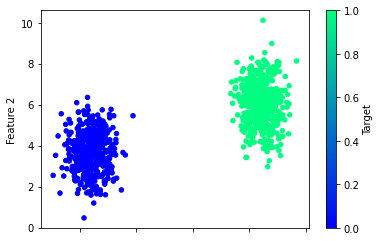

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
#training data

In [4]:
#prepare the dataset for our neural network model

In [5]:
#to normalize our dummy data

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

#defining the act function as part of the first layer is suggested but not required 

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#we only want a yes or no binary decision; therefore, we only need one output neuron


In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

training/fitting our model to the dummy data

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 1ms/step - loss: 0.4904 - accuracy: 0.9960
Epoch 2/100
24/24 [==============================] - 0s 695us/step - loss: 0.4782 - accuracy: 0.9960
Epoch 3/100
24/24 [==============================] - 0s 687us/step - loss: 0.4661 - accuracy: 0.9960
Epoch 4/100
24/24 [==============================] - 0s 647us/step - loss: 0.4543 - accuracy: 0.9960
Epoch 5/100
24/24 [==============================] - 0s 630us/step - loss: 0.4427 - accuracy: 0.9960
Epoch 6/100
24/24 [==============================] - 0s 690us/step - loss: 0.4313 - accuracy: 0.9960
Epoch 7/100
24/24 [==============================] - 0s 731us/step - loss: 0.4202 - accuracy: 0.9960
Epoch 8/100
24/24 [==============================] - 0s 655us/step - loss: 0.4095 - accuracy: 0.9960
Epoch 9/100
24/24 [==============================] - 0s 623us/step - loss: 0.3991 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 663us/step - loss: 0.3890 - accuracy

24/24 [==============================] - 0s 583us/step - loss: 0.0969 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 583us/step - loss: 0.0954 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 588us/step - loss: 0.0940 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 587us/step - loss: 0.0925 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 580us/step - loss: 0.0911 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 562us/step - loss: 0.0897 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 602us/step - loss: 0.0884 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 563us/step - loss: 0.0870 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 569us/step - loss: 0.0858 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 584us/step - loss: 0.0845 - accuracy: 

<AxesSubplot:>

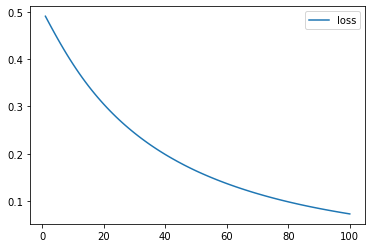

In [13]:
#visualize our model's loss over the full 100 epochs

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

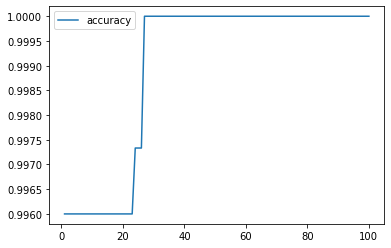

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.0680 - accuracy: 1.0000
Loss: 0.06802098453044891, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

start testing the limits of the basic neural network

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

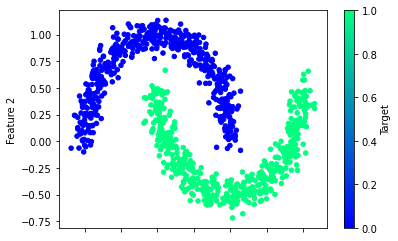

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.1978 - accuracy: 0.4573
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.4840
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9603 - accuracy: 0.4960
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8982 - accuracy: 0.5120
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8558 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8229 - accuracy: 0.5467
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7968 - accuracy: 0.5587
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.5667
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7566 - accuracy: 0.5773
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7403 - accuracy: 0.5840
Epoch 11/

24/24 [==============================] - 0s 991us/step - loss: 0.4278 - accuracy: 0.7787
Epoch 83/100
24/24 [==============================] - 0s 984us/step - loss: 0.4242 - accuracy: 0.7827
Epoch 84/100
24/24 [==============================] - 0s 924us/step - loss: 0.4209 - accuracy: 0.7867
Epoch 85/100
24/24 [==============================] - 0s 991us/step - loss: 0.4177 - accuracy: 0.7867
Epoch 86/100
24/24 [==============================] - 0s 937us/step - loss: 0.4144 - accuracy: 0.7907
Epoch 87/100
24/24 [==============================] - 0s 935us/step - loss: 0.4112 - accuracy: 0.7947
Epoch 88/100
24/24 [==============================] - 0s 930us/step - loss: 0.4078 - accuracy: 0.8013
Epoch 89/100
24/24 [==============================] - 0s 924us/step - loss: 0.4044 - accuracy: 0.8067
Epoch 90/100
24/24 [==============================] - 0s 914us/step - loss: 0.4011 - accuracy: 0.8107
Epoch 91/100
24/24 [==============================] - 0s 906us/step - loss: 0.3978 - accuracy: 

<AxesSubplot:>

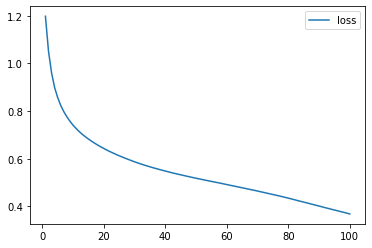

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

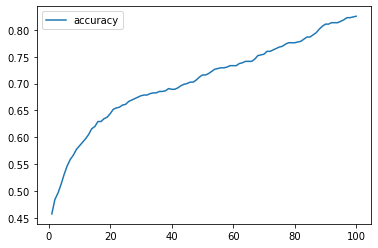

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 2s 2ms/step - loss: 0.8682 - accuracy: 0.4613
Epoch 2/100
24/24 [==============================] - 0s 903us/step - loss: 0.8216 - accuracy: 0.4840
Epoch 3/100
24/24 [==============================] - 0s 755us/step - loss: 0.7809 - accuracy: 0.5000
Epoch 4/100
24/24 [==============================] - 0s 790us/step - loss: 0.7448 - accuracy: 0.5360
Epoch 5/100
24/24 [==============================] - 0s 745us/step - loss: 0.7125 - accuracy: 0.5347
Epoch 6/100
24/24 [==============================] - 0s 777us/step - loss: 0.6832 - accuracy: 0.5187
Epoch 7/100
24/24 [==============================] - 0s 693us/step - loss: 0.6565 - accuracy: 0.5080
Epoch 8/100
24/24 [==============================] - 0s 724us/step - loss: 0.6320 - accuracy: 0.5253
Epoch 9/100
24/24 [==============================] - 0s 714us/step - loss: 0.6091 - accuracy: 0.5587
Epoch 10/100
24/24 [==============================] - 0s 698us/step - loss: 0.5876 - accuracy

24/24 [==============================] - 0s 677us/step - loss: 0.2808 - accuracy: 0.8947
Epoch 82/100
24/24 [==============================] - 0s 689us/step - loss: 0.2800 - accuracy: 0.8947
Epoch 83/100
24/24 [==============================] - 0s 676us/step - loss: 0.2790 - accuracy: 0.8947
Epoch 84/100
24/24 [==============================] - 0s 689us/step - loss: 0.2782 - accuracy: 0.8947
Epoch 85/100
24/24 [==============================] - 0s 664us/step - loss: 0.2773 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 622us/step - loss: 0.2765 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 672us/step - loss: 0.2758 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 624us/step - loss: 0.2750 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 710us/step - loss: 0.2742 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 694us/step - loss: 0.2734 - accuracy: 